### Strength of Material : Stress - Strain Prediction using Machine Learning 

#### Hemant Thapa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 1. Stress-strain curves for 4 different materials

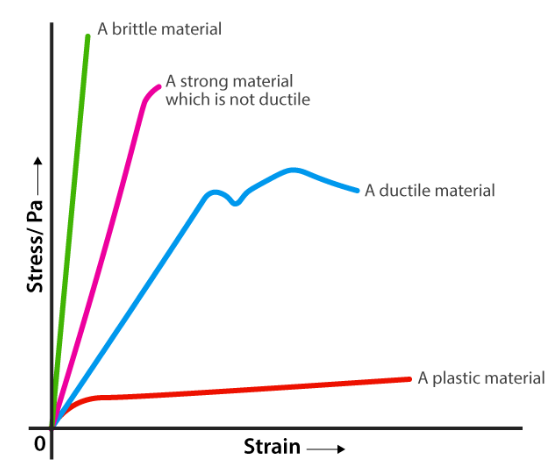

##### The stress-strain graph has different points or regions:

1. **Proportional Limit**
2. **Elastic Limit**
3. **Yield Point**
4. **Ultimate Stress Point**
5. **Fracture or Breaking Point**

#### Proportional Limit

The region in the stress-strain curve obeys Hooke’s Law. In this limit, the stress ratio with strain gives us a proportionality constant known as Young’s Modulus. The point OA in the graph is called the proportional limit.

#### Elastic Limit

It is the point in the graph where the material returns to its original position when the load acting on it is completely removed. Beyond this limit, the material doesn’t return to its original position, and plastic deformation starts to appear in it.

#### Yield Point

The yield point is defined as the point at which the material starts to deform plastically. After the yield point is passed, permanent plastic deformation occurs. There are two yield points: 
- Upper Yield Point
- Lower Yield Point

#### Ultimate Stress Point

It is a point that represents the maximum stress that a material can endure before failure. Beyond this point, failure occurs.

#### Fracture or Breaking Point

It is the point in the stress-strain curve at which the failure of the material takes place.

#### Yield Strength Graph

Each material possesses a characteristic stress-strain curve that allows us to determine what application they are best suited for. Each material curve possesses different transition points, i.e. from elasticity to plasticity and finally to breakage.

- The point at which the material transforms from elastic to plastic is known as the yield point.
- The magnitude of the stress at which the transition from elastic to plastic occurs is known as the yield strength.
- Yield strength is a constant that represents the maximum limit of elastic behavior.
- Ductile materials like metals have higher yield strength values than plastics.

#### 2. Data Collected through testile test 

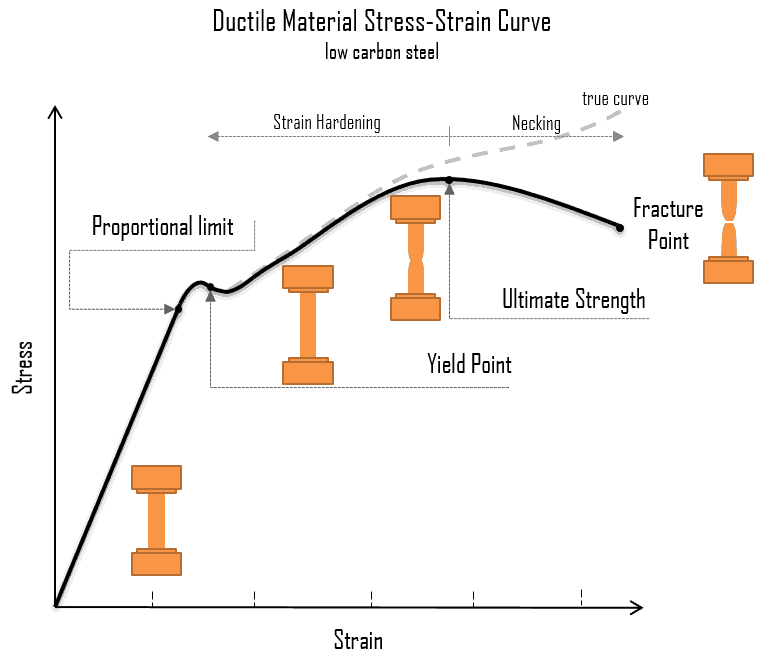

In [2]:
data = {
    "Load (kN)": [0, 10, 17, 25, 30, 34, 37.5, 38.5, 36],
    "Extension (mm)": [0, 0.05, 0.08, 0.11, 0.14, 0.20, 0.40, 0.60, 0.90],
}
df = pd.DataFrame(data)
df

,Load (kN),Extension (mm)
0,0.0,0.00
1,10.0,0.05
2,17.0,0.08
3,25.0,0.11
4,30.0,0.14
5,34.0,0.20
6,37.5,0.40
7,38.5,0.60
8,36.0,0.90


In [3]:
# constants for calculations
gauge_length = 40  # mm
diameter = 7.42    # mm
area = np.pi * (diameter / 2) ** 2  # mm^2

In [4]:
# stress in MPa (MegaPascals) at each load point
df['Stress (MPa)'] = df['Load (kN)'] * 1000 / area

# strain (dimensionless) at each load point
df['Strain'] = df['Extension (mm)'] / gauge_length

In [5]:
# modulus of elasticity (Young's modulus)
# linear behavior in the initial part of the curve, using first two non-zero points
stress_difference = df.iloc[2]['Stress (MPa)'] - df.iloc[1]['Stress (MPa)']
strain_difference = df.iloc[2]['Strain'] - df.iloc[1]['Strain']
modulus_of_elasticity = stress_difference / strain_difference

# stress at the limit of proportionality (Yield Point)
# last point before the curve departs from linearity
yield_stress = df.iloc[-3]['Stress (MPa)']

# ultimate tensile strength (Max stress)
ultimate_tensile_strength = df['Stress (MPa)'].max()

# percentage elongation (at fracture point)
percentage_elongation = (df.iloc[-1]['Extension (mm)'] / gauge_length) * 100

##### 3. Stress - Strain Curve 

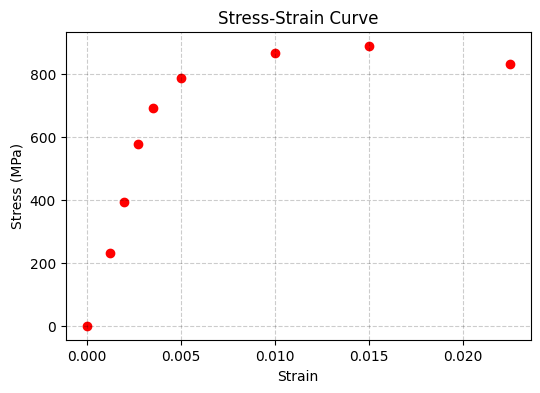

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Strain'], df['Stress (MPa)'], color='red')
plt.title('Stress-Strain Curve')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

In [7]:
df

,Load (kN),Extension (mm),Stress (MPa),Strain
0,0.0,0.00,0.000000,0.00000
1,10.0,0.05,231.260951,0.00125
2,17.0,0.08,393.143617,0.00200
3,25.0,0.11,578.152379,0.00275
4,30.0,0.14,693.782854,0.00350
5,34.0,0.20,786.287235,0.00500
6,37.5,0.40,867.228568,0.01000
7,38.5,0.60,890.354663,0.01500
8,36.0,0.90,832.539425,0.02250


#### 4. Feature Selection & Making Prediction 

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [9]:
X = df[['Strain']]
y = df['Stress (MPa)']

In [10]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

In [11]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [12]:
y_pred = model.predict(X_poly)

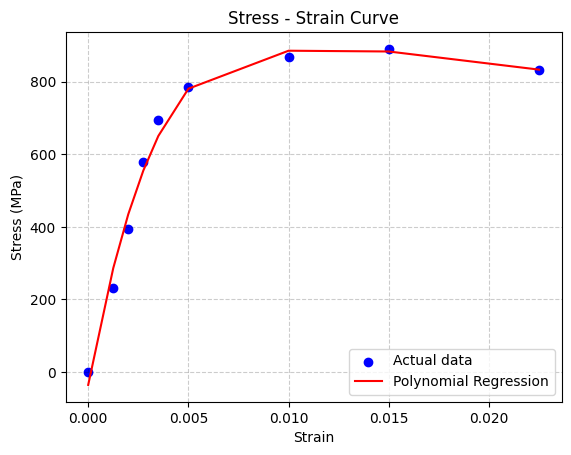

In [13]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Stress - Strain Curve')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.legend()
plt.show()

In [14]:
# new strain values with a minimum gap
# set the minimum gap between strain values
min_strain_gap = 0.001  
new_strain_values = np.arange(min(df['Strain']), max(df['Strain']), min_strain_gap)

# transform the new strain values to polynomial features
new_strain_poly = poly.transform(new_strain_values.reshape(-1, 1))

# make predictions for the new strain values
new_stress_pred = model.predict(new_strain_poly)

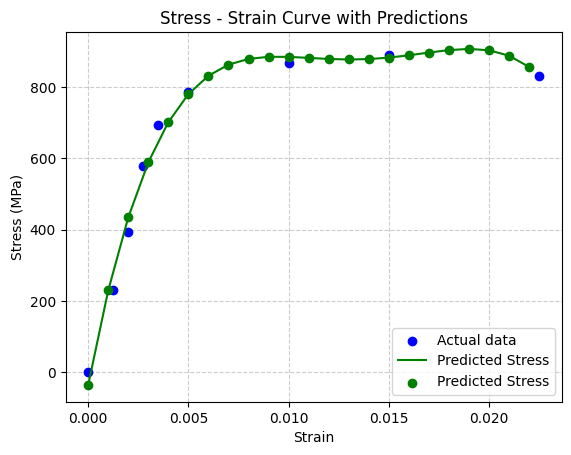

In [15]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(new_strain_values, new_stress_pred, color='green', label='Predicted Stress')
plt.scatter(new_strain_values, new_stress_pred, color='green', label='Predicted Stress')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Stress - Strain Curve with Predictions')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.legend()
plt.show()

#### 5. Model Evaluation 

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [18]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 981.6409745495389
R-squared (R2) Score: 0.9888270143147082


#### 6. Residual Analysis 

In [19]:
residuals = y - y_pred

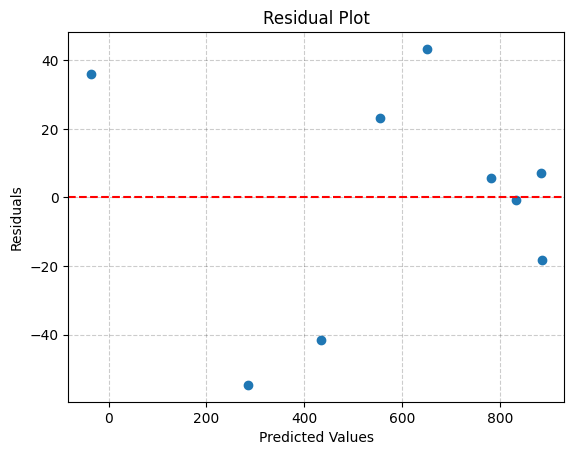

In [20]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

#### 7. Young Modulus of Elasticiy, Yield Stress, Ultimate Tensile Stress and percentage Elongation. 

In [21]:
print("Modulus of Elasticity (Young's Modulus): {:.2f} MPa".format(modulus_of_elasticity))
print("Yield Stress: {:.2f} MPa".format(yield_stress))
print("Ultimate Tensile Strength: {:.2f} MPa".format(ultimate_tensile_strength))
print("Percentage Elongation: {:.2f}%".format(percentage_elongation))

Modulus of Elasticity (Young's Modulus): 215843.55 MPa
Yield Stress: 867.23 MPa
Ultimate Tensile Strength: 890.35 MPa
Percentage Elongation: 2.25%


#### 8. Two percent proof Strees 

In [22]:
# stress and strain data points
stress_data = np.array([0, 231.2609, 393.1436, 578.1524, 693.7829, 786.2872, 867.2286, 890.3547, 832.5394])
strain_data = np.array([0, 0.00125, 0.002, 0.00275, 0.0035, 0.005, 0.01, 0.015, 0.0225])

# proof strain is 0.002 for the 0.2% proof stress
proof_strain = 0.002

# interpolate the stress at the proof strain value
# since the stress-strain curve is not linear after yielding, we interpolate only in the initial linear part
# we take the first non-zero stress and strain data points for interpolation
initial_stress_data = stress_data[1:3]  # we only consider the first linear part of the curve
initial_strain_data = strain_data[1:3]

# perform the interpolation
proof_stress = np.interp(proof_strain, initial_strain_data, initial_stress_data)

proof_stress

393.1436

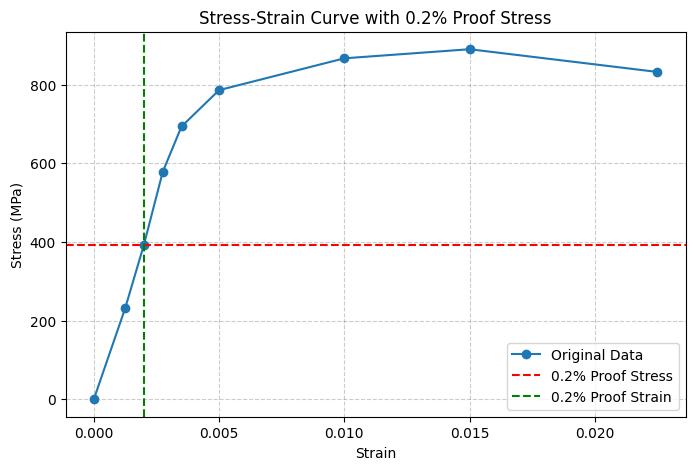

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(strain_data, stress_data, marker='o', label='Original Data')
plt.axhline(y=proof_stress, color='r', linestyle='--', label='0.2% Proof Stress')
plt.axvline(x=proof_strain, color='g', linestyle='--', label='0.2% Proof Strain')
plt.title('Stress-Strain Curve with 0.2% Proof Stress')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

#### References:

1. [Yield Strength - BYJU'S](https://byjus.com/physics/yield-strength/)
2. [Ultimate Tensile Strength (UTS) - Material Properties](https://material-properties.org/what-is-ultimate-tensile-strength-uts-definition/)
3. [Tensile Test Procedures - Victor Testing Machine](https://www.victortestingmachine.com/tensile-test-procedures/)
